# Overview: 
In this section I created multiple visualizations of both the online.csv and order.csv datasets. In this section I checked for missing values, date ranges, averages over time, typical customer engagement patterns, and even a directed graph showing which products are purchased together. Visualizing data to gain an intuitive understanding of the data's relationships and data quality issues are critical. Many of the data quality issues were fixed using functions stored and dataset_creation.py. These functions were then unit tested so as to reduce the chances of bugs entering my code. Unit testing is often a step that is often over looked by other data scientists, but is really helpful in improving overall code quality.

https://github.com/sflydatascience/homework1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx

pd.set_option('display.max_rows', 1000)

# Explore Online

#### Basic Data Quality Checks and Summary

In [2]:
online = pd.read_csv('data/online.csv')

online['dt'] = pd.to_datetime(online['dt'])
online['event1'] = online['event1'].fillna(-1)

In [3]:
online['dt'].describe()

count                  954774
unique                 942579
top       2016-03-28 07:16:46
freq                        4
first     2016-01-01 00:00:08
last      2017-12-31 23:58:05
Name: dt, dtype: object

In [4]:
online.shape

(954774, 7)

In [5]:
online[['session', 'dt','event1','event2']].drop_duplicates().shape

(954774, 4)

In [6]:
online.groupby(
    ['session','category', 'event1', 'event2'], 
    as_index=False
).count()[
     ['session','category', 'event1', 'event2', 'visitor']
]

,session,category,event1,event2,visitor
0,2,2,-1.0,9,1
1,3,2,-1.0,8,1
2,6,2,-1.0,9,1
3,9,2,-1.0,3,1
4,9,2,-1.0,7,1
...,...,...,...,...,...
954769,3750690,3,11.0,10,1
954770,3750694,3,-1.0,10,1
954771,3750721,3,-1.0,10,1
954772,3750758,3,-1.0,10,1


In [7]:
online.head()

,session,visitor,dt,custno,category,event1,event2
0,419542,140970,2016-09-16 05:03:23,3840,1,-1.0,1
1,3030130,14501,2017-11-13 04:58:12,70400,1,-1.0,1
2,2638740,419353,2017-05-24 16:10:38,21248,1,-1.0,1
3,880408,90673,2017-10-28 13:42:38,39168,1,-1.0,1
4,2612179,191542,2016-05-17 06:30:32,47616,1,-1.0,1


In [8]:
online.isna().sum()

session     0
visitor     0
dt          0
custno      0
category    0
event1      0
event2      0
dtype: int64

In [9]:
online.isna().sum()

session     0
visitor     0
dt          0
custno      0
category    0
event1      0
event2      0
dtype: int64

#### Number of Sessions by Day of Week

In [10]:
online.head()

,session,visitor,dt,custno,category,event1,event2
0,419542,140970,2016-09-16 05:03:23,3840,1,-1.0,1
1,3030130,14501,2017-11-13 04:58:12,70400,1,-1.0,1
2,2638740,419353,2017-05-24 16:10:38,21248,1,-1.0,1
3,880408,90673,2017-10-28 13:42:38,39168,1,-1.0,1
4,2612179,191542,2016-05-17 06:30:32,47616,1,-1.0,1


In [11]:
online['DOW'] = online['dt'].dt.dayofweek
unique_sessions = online[['DOW', 'session']].drop_duplicates()
sessions_by_dow = unique_sessions.groupby('DOW').count()

In [12]:
sessions_by_dow.index = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]

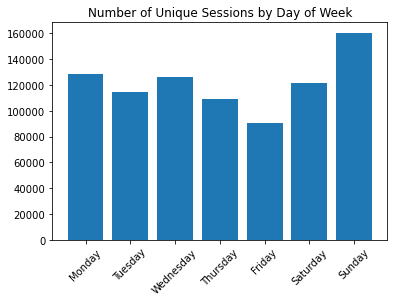

In [13]:
plt.title('Number of Unique Sessions by Day of Week')
plt.bar(sessions_by_dow.index, sessions_by_dow['session'])
plt.xticks(rotation=45)
plt.show()

#### Number of Sessions By Day

In [14]:
online['date'] = online['dt'].dt.date
unique_sessions = online[['date', 'session']].drop_duplicates()
sessions_per_day = unique_sessions.groupby('date').count()

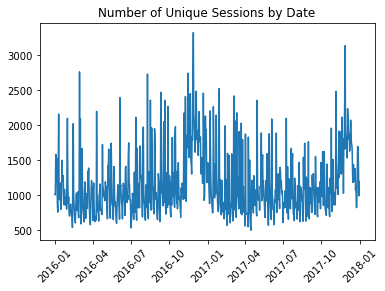

In [15]:
plt.plot(sessions_per_day)
plt.title('Number of Unique Sessions by Date')
plt.xticks(rotation=45)
plt.show()

#### Distince Customers

#### Evaluate Event 1

In [16]:
online['n'] = 1

In [17]:
event_1_counts = online.groupby('event1').count()['session']

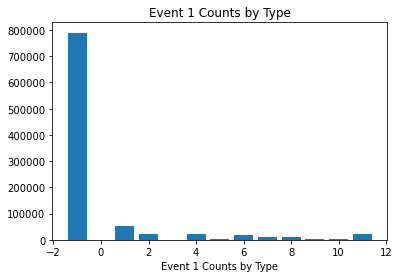

In [18]:
plt.bar(event_1_counts.index, event_1_counts)
plt.title('Event 1 Counts by Type')
plt.xlabel('Event 1 Counts by Type')
plt.show()

In [19]:
online

,session,visitor,dt,custno,category,event1,event2,DOW,date,n
0,419542,140970,2016-09-16 05:03:23,3840,1,-1.0,1,4,2016-09-16,1
1,3030130,14501,2017-11-13 04:58:12,70400,1,-1.0,1,0,2017-11-13,1
2,2638740,419353,2017-05-24 16:10:38,21248,1,-1.0,1,2,2017-05-24,1
3,880408,90673,2017-10-28 13:42:38,39168,1,-1.0,1,5,2017-10-28,1
4,2612179,191542,2016-05-17 06:30:32,47616,1,-1.0,1,1,2016-05-17,1
...,...,...,...,...,...,...,...,...,...,...
954769,1136918,61351,2017-01-10 18:16:01,25087,3,11.0,10,1,2017-01-10,1
954770,2400378,226006,2017-07-14 13:46:19,27135,3,11.0,10,4,2017-07-14,1
954771,2014765,210713,2017-08-19 14:47:11,35583,3,11.0,10,5,2017-08-19,1
954772,2963482,144530,2016-01-15 15:55:51,41215,3,11.0,10,4,2016-01-15,1


#### Evaluate Event 2

In [20]:
event_2_counts = online.groupby('event2').count()['session']

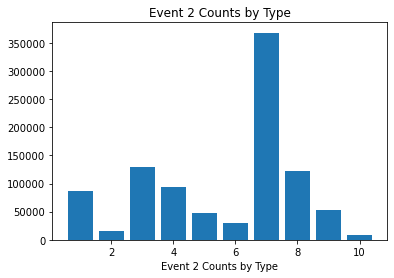

In [21]:
plt.bar(event_2_counts.index, event_2_counts)
plt.title('Event 2 Counts by Type')
plt.xlabel('Event 2 Counts by Type')
plt.show()

# Explore order.csv

In [22]:
order = pd.read_csv('data/order.csv')

In [23]:
order['prodcat2'].unique().shape

(252,)

In [24]:
order.head()

,custno,ordno,orderdate,prodcat2,prodcat1,revenue
0,18944,64694,2016-11-27 20:57:20,NaN,1,53.30
1,18944,114405,2017-04-29 20:18:04,NaN,1,0.10
2,18944,28906,2017-04-23 21:31:03,NaN,1,141.66
3,36096,62681,2016-02-25 07:16:33,NaN,1,36.82
4,1,1,2017-06-12 08:27:59,NaN,1,8.35


#### Assumptions
    - Assuming that prodcat2 of 96 is always associated prodcat1 of 7
        - Assuming that the overlap of with prodcat1 is a data quality issue
        - Normally I would confirm this with a SME, but elected not to because of time

In [25]:
def clean_96_overlap(prd_cat1, prd_cat2):
    if prd_cat2 == 96:
        prd_cat1 = 7
    return prd_cat1

def test_clean_96_overlap():
    in_data = [
        [0,1],
        [3,96],
        [7,96]
    ]
    obs = [clean_96_overlap(x[0], x[1]) for x in in_data]
    exp = [0,7,7]
    assert obs == exp

test_clean_96_overlap()

In [26]:
def prod_cat2_nan_fill(prd_cat1, prd_cat2):
    if np.isnan(prd_cat2):
        return -1*prd_cat1
    else:
        return prd_cat2

def test_prod_cat2_nan_fill():
    in_data = [
        [1,np.nan],
        [2,np.nan],
        [3,199],
        [1,2]
    ]
    obs = [prod_cat2_nan_fill(x[0], x[1]) for x in in_data]
    exp = [-1,-2, 199, 2]
    assert obs == exp, f'obs:{obs}, exp:{exp}'

test_prod_cat2_nan_fill()

In [27]:
order['prodcat2'] = order[['prodcat1', 'prodcat2']].apply(
    lambda row: prod_cat2_nan_fill(row['prodcat1'], row['prodcat2']), axis=1
)

In [28]:
order['prodcat1'] = order[['prodcat1', 'prodcat2']].apply(
    lambda row: clean_96_overlap(row['prodcat1'], row['prodcat2']), axis=1
)

#### Clean Up Dates

In [29]:
order['orderdate'] = pd.to_datetime(order['orderdate'])
order['order_year_month'] = order['orderdate'].dt.to_period('M')
order['order_year_month'] = order['order_year_month'].apply(lambda dt: dt.to_timestamp())

#### Determine Date Range

In [30]:
order['orderdate'].describe()

count                  263278
unique                 149482
top       2018-09-10 13:41:30
freq                       26
first     2016-01-01 05:05:14
last      2019-01-02 23:54:58
Name: orderdate, dtype: object

#### Orders by Month

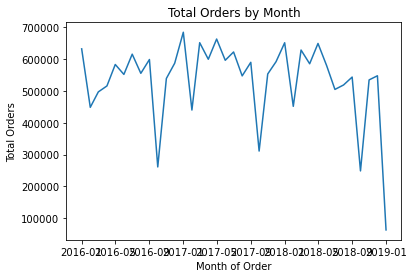

In [31]:
orders_by_month = order.groupby('order_year_month').sum()['revenue']

plt.title('Total Orders by Month')
plt.plot(orders_by_month.index, orders_by_month.values)
plt.xlabel('Month of Order')
plt.ylabel('Total Orders')
plt.show()

#### Check Primary Key

In [32]:
order.shape

(263278, 7)

In [33]:
order

,custno,ordno,orderdate,prodcat2,prodcat1,revenue,order_year_month
0,18944,64694,2016-11-27 20:57:20,-1.0,1.0,53.30,2016-11-01
1,18944,114405,2017-04-29 20:18:04,-1.0,1.0,0.10,2017-04-01
2,18944,28906,2017-04-23 21:31:03,-1.0,1.0,141.66,2017-04-01
3,36096,62681,2016-02-25 07:16:33,-1.0,1.0,36.82,2016-02-01
4,1,1,2017-06-12 08:27:59,-1.0,1.0,8.35,2017-06-01
...,...,...,...,...,...,...,...
263273,7443,99084,2018-09-23 16:02:08,253.0,1.0,6.67,2018-09-01
263274,6693,8660,2017-06-08 21:37:34,253.0,1.0,122.98,2017-06-01
263275,22914,36144,2017-05-12 14:07:18,253.0,1.0,143.34,2017-05-01
263276,36088,62664,2018-03-11 20:19:18,253.0,1.0,49.75,2018-03-01


In [34]:
order[['ordno','prodcat2', 'revenue']].drop_duplicates().shape

(263278, 3)

#### Distribution of Revenue by Category 

In [35]:
order.groupby('prodcat1').agg('describe')['revenue']

,count,mean,std,min,25%,50%,75%,max
prodcat1,,,,,,,,
1.0,48672.0,74.880807,43.219422,0.00,37.0700,75.120,112.00,150.0
2.0,88684.0,75.208527,43.299121,0.00,37.7600,75.255,112.62,150.0
3.0,44005.0,74.751113,43.193123,0.01,37.3400,74.620,112.00,150.0
4.0,46681.0,74.653734,43.349344,0.00,37.1400,74.550,112.11,150.0
5.0,11180.0,75.676608,43.065655,0.00,38.7975,75.685,112.90,150.0
7.0,24056.0,74.620874,43.418959,0.01,36.8400,74.165,112.22,150.0


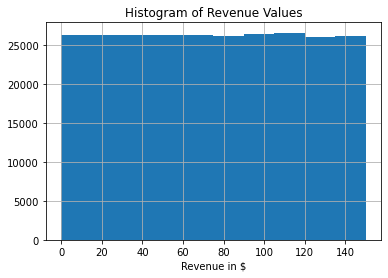

In [36]:
order['revenue'].hist()
plt.title('Histogram of Revenue Values')
plt.xlabel('Revenue in $')
plt.show()

#### Orders of Prodcat1 by date

In [37]:
orders_by_date_and_cat1_long = order.groupby(
    ['order_year_month', 'prodcat1'], as_index=False
).count()[
    ['order_year_month', 'prodcat1', 'ordno']
]

In [38]:
orders_by_date_and_cat1 = orders_by_date_and_cat1_long.pivot(
    index='order_year_month', columns='prodcat1', values='ordno'
)

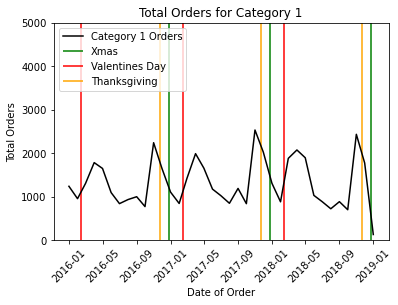

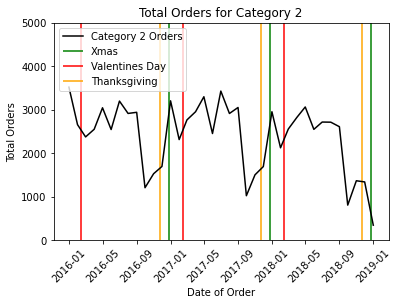

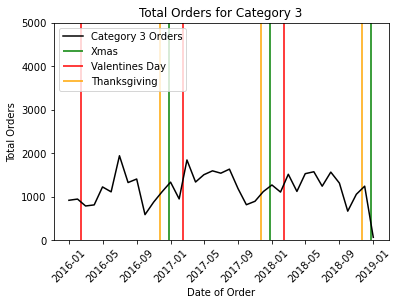

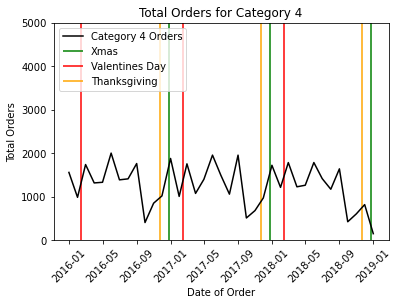

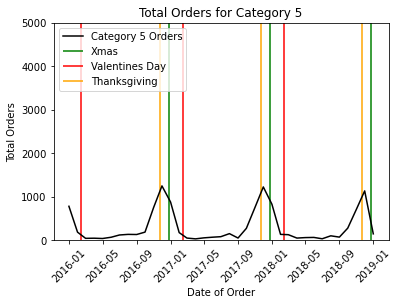

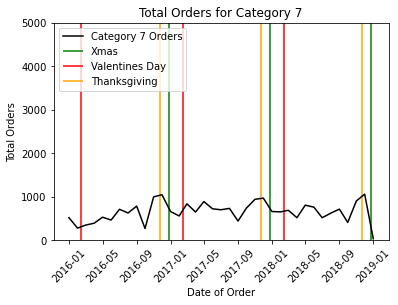

In [39]:
for i in [1,2,3,4,5,7]:
    plt.plot(
        orders_by_date_and_cat1.index, 
        orders_by_date_and_cat1[i], 
        label=f'Category {i} Orders',
        color='black'
    )
    plt.title(f'Total Orders for Category {i}')
    plt.xticks(rotation=45)
    plt.ylabel('Total Orders')
    plt.xlabel('Date of Order')
    plt.vlines([
        pd.to_datetime('12-25-2016'), pd.to_datetime('12-25-2017'), pd.to_datetime('12-25-2018')
    ],0,5000, colors='Green', label='Xmas')
    plt.vlines([
        pd.to_datetime('2-14-2016'), pd.to_datetime('2-14-2017'), pd.to_datetime('2-14-2018')
    ],0,5000, colors='red', label='Valentines Day')
    plt.vlines([
        pd.to_datetime('11-24-2016'), pd.to_datetime('11-23-2017'), pd.to_datetime('11-22-2018')
    ],0,5000, colors='Orange', label='Thanksgiving')
    plt.ylim(0,5000)
    plt.legend(loc='upper left')
    plt.show()

# Correlations
- It looks like there aren't that many strong correlations at the category level

In [40]:
import seaborn as sns

In [41]:
order['n'] = 1
prdcat1_orders = order[['ordno', 'prodcat1', 'n']].drop_duplicates()
cat1_purchases_by_order = prdcat1_orders.pivot('ordno', 'prodcat1','n').fillna(0)
cat1_corr = cat1_purchases_by_order.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(cat1_corr, dtype=np.bool))

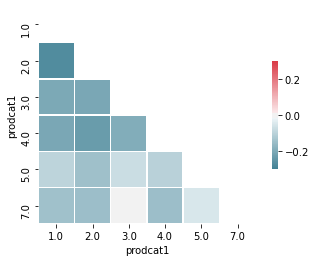

In [42]:
sns.heatmap(cat1_corr,center=0,mask=mask,
            vmax=.3, vmin=-.3,cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Pair-wise Directed Graph of Items

## Get Edge Data

#### Get counts from each order

In [43]:
order['n'] = 1
prdcat2_orders = order[['ordno', 'prodcat2', 'n']].drop_duplicates()
purchases_by_order = prdcat2_orders.pivot('ordno', 'prodcat2','n').fillna(0)

#### Get Pairwise Association Rules
    - Would have created even more association rules with a lower min_support, but my Desktop ran out of RAM

In [44]:
itemsets = apriori(purchases_by_order, min_support=0.0008, use_colnames=True)
rules = association_rules(itemsets, metric="lift", min_threshold=1)
rules['n_before_after'] = rules['antecedents'].apply(len) + rules['consequents'].apply(len)
one2one_rules = rules[rules['n_before_after'] == 2].copy()

#### Clean up Data

In [45]:
def clean_association_rules(raw_value):
    return list(raw_value)[0]

one2one_rules['antecedents'] = one2one_rules['antecedents'].apply(clean_association_rules).astype(int)
one2one_rules['consequents'] = one2one_rules['consequents'].apply(clean_association_rules).astype(int)

one2one_rules.sort_values('lift', ascending =False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,n_before_after
229,93,138,0.004976,0.001757,0.001363,0.273826,155.879593,0.001354,1.374660,2
228,138,93,0.001757,0.004976,0.001363,0.775665,155.879593,0.001354,4.435446,2
95,67,10,0.002572,0.003801,0.001229,0.477922,125.752302,0.001219,1.908143,2
94,10,67,0.003801,0.002572,0.001229,0.323374,125.752302,0.001219,1.474122,2
199,94,28,0.001944,0.031934,0.001830,0.941581,29.485598,0.001768,16.571019,2
198,28,94,0.031934,0.001944,0.001830,0.057310,29.485598,0.001768,1.058732,2
173,39,20,0.015503,0.007220,0.002485,0.160276,22.197968,0.002373,1.182269,2
172,20,39,0.007220,0.015503,0.002485,0.344126,22.197968,0.002373,1.501046,2
221,54,58,0.007274,0.017326,0.002418,0.332415,19.185885,0.002292,1.471983,2
220,58,54,0.017326,0.007274,0.002418,0.139553,19.185885,0.002292,1.153733,2


In [46]:
one2one_rules.shape

(232, 10)

## Get Node Data

In [47]:
order.head()

,custno,ordno,orderdate,prodcat2,prodcat1,revenue,order_year_month,n
0,18944,64694,2016-11-27 20:57:20,-1.0,1.0,53.30,2016-11-01,1
1,18944,114405,2017-04-29 20:18:04,-1.0,1.0,0.10,2017-04-01,1
2,18944,28906,2017-04-23 21:31:03,-1.0,1.0,141.66,2017-04-01,1
3,36096,62681,2016-02-25 07:16:33,-1.0,1.0,36.82,2016-02-01,1
4,1,1,2017-06-12 08:27:59,-1.0,1.0,8.35,2017-06-01,1


In [48]:
nodes = order.groupby(['prodcat2', 'prodcat1'], as_index=False).count()[['prodcat2','prodcat1','n']]
nodes['log_n_orders'] = np.log2(nodes['n'])

#### Set Node Colors

In [49]:
prdcat1_color = {
    1: '#fc4f30',
    2: '#0085CA',
    3: 'green',
    4: 'orange',
    5: 'grey',
    7: '#b19cd9'
}

In [50]:
nodes['color'] = nodes['prodcat1'].apply(lambda row: prdcat1_color[row])

In [51]:
assert len(set(nodes['prodcat2'])) == len(nodes['prodcat2'])

#### Which Products Tend to be Purchased Together
- Load Edges
- Load Nodes
- Visualize

## Plot Only Products with an Edge

#### Filter Out Nodes with No Edges

In [52]:
connected_items = set(one2one_rules['antecedents']).union(set(one2one_rules['consequents']))
connected_nodes = nodes[nodes['prodcat2'].isin(connected_items)]

In [53]:
G = nx.from_pandas_edgelist(one2one_rules, 'antecedents', 'consequents', edge_attr ='confidence') 
G.add_nodes_from(connected_nodes['prodcat2'], size=connected_nodes['log_n_orders'])

In [54]:
layouts = [
    'random_layout',
    'shell_layout',
    'fruchterman_reingold_layout',
    'spectral_layout',
    'kamada_kawai_layout',
    'spring_layout',
    'circular_layout'
]

#### Key Takeaways 
    - It looks like product category 2 products are pretty highly associated with 
    - There appear to be 2 clusters of products.

random_layout


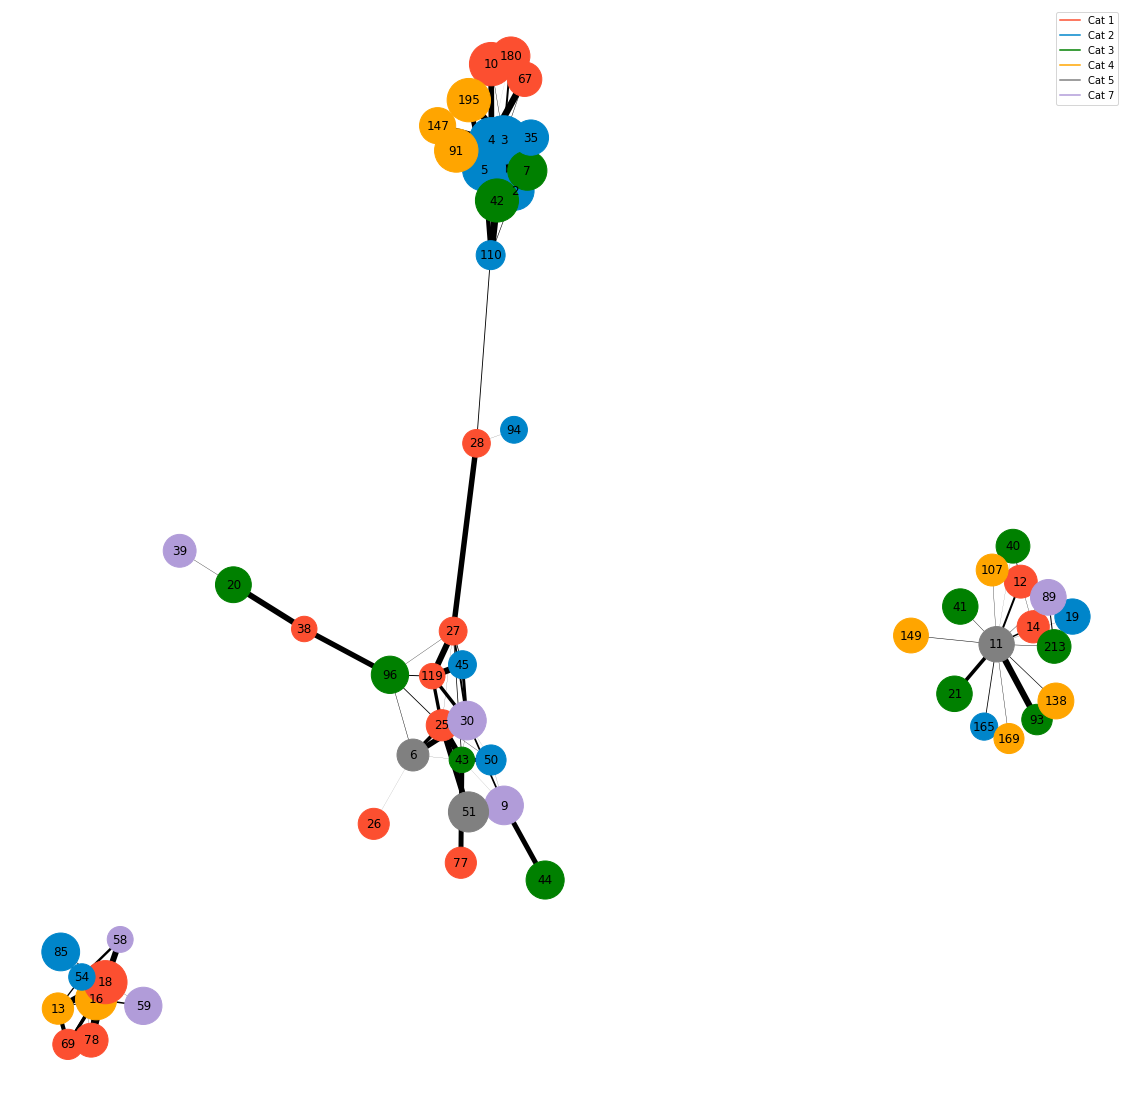

shell_layout


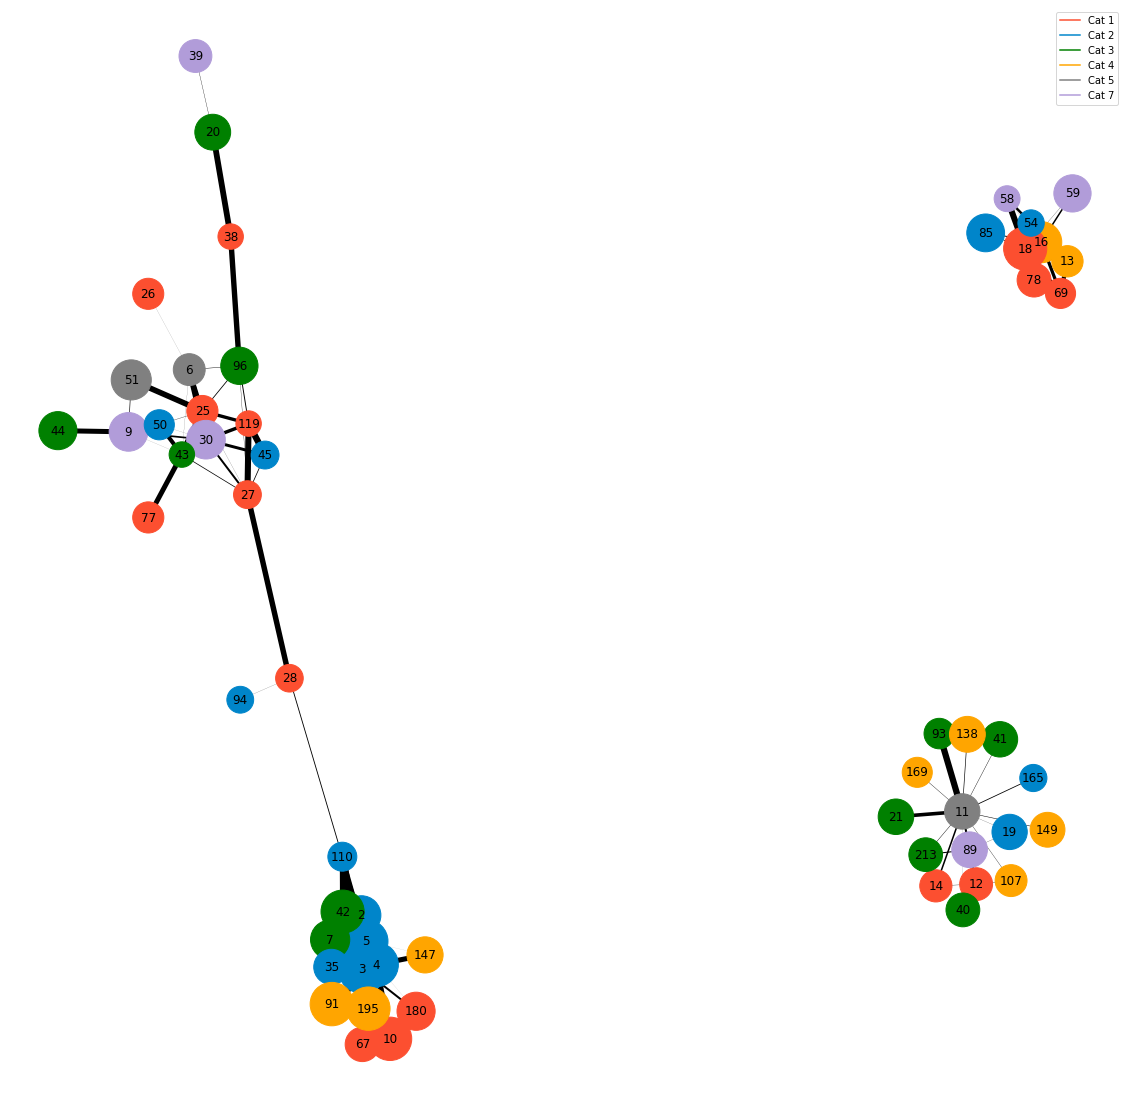

fruchterman_reingold_layout


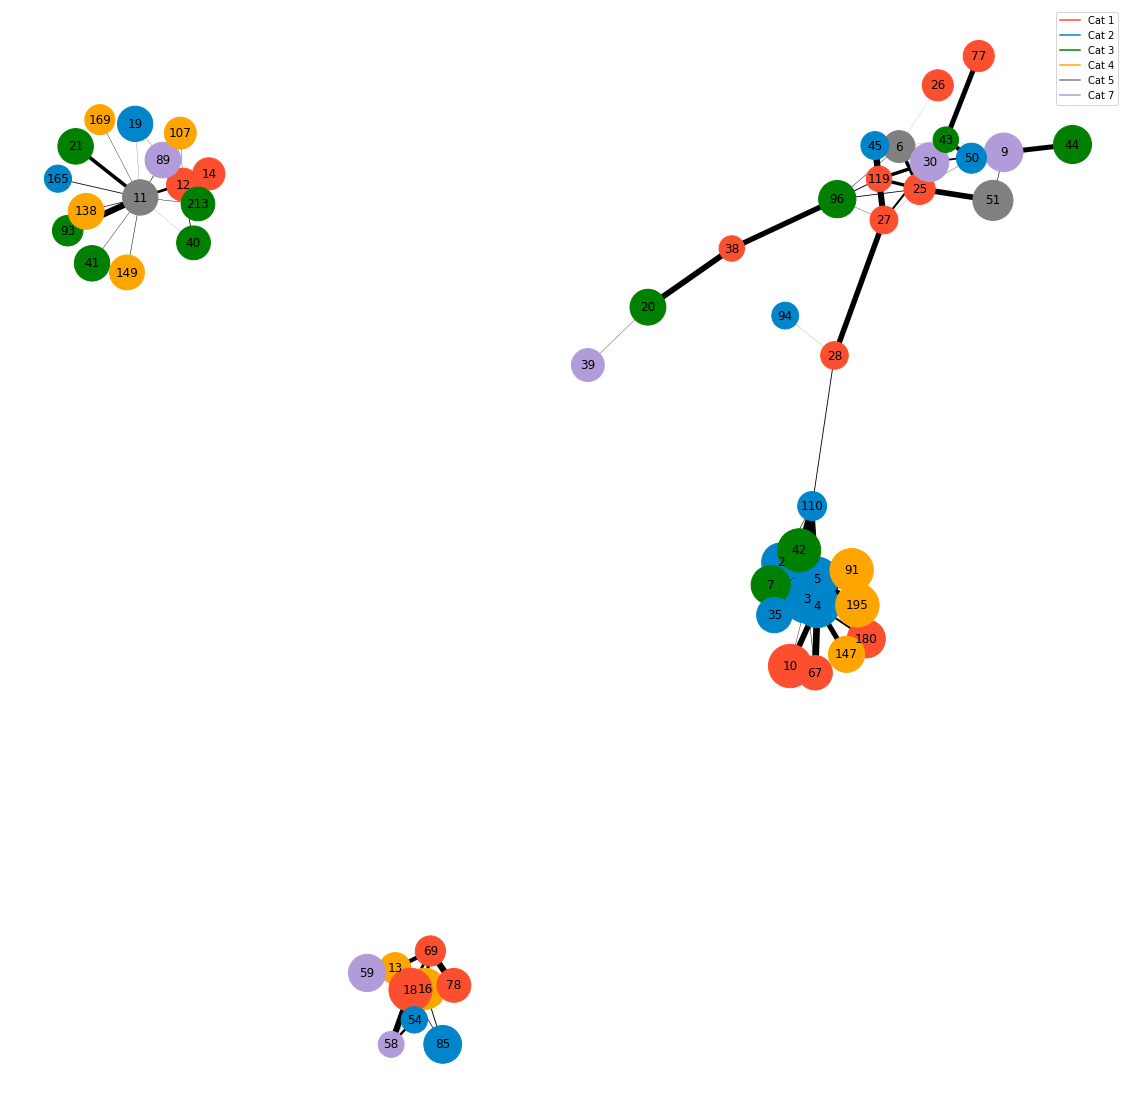

spectral_layout


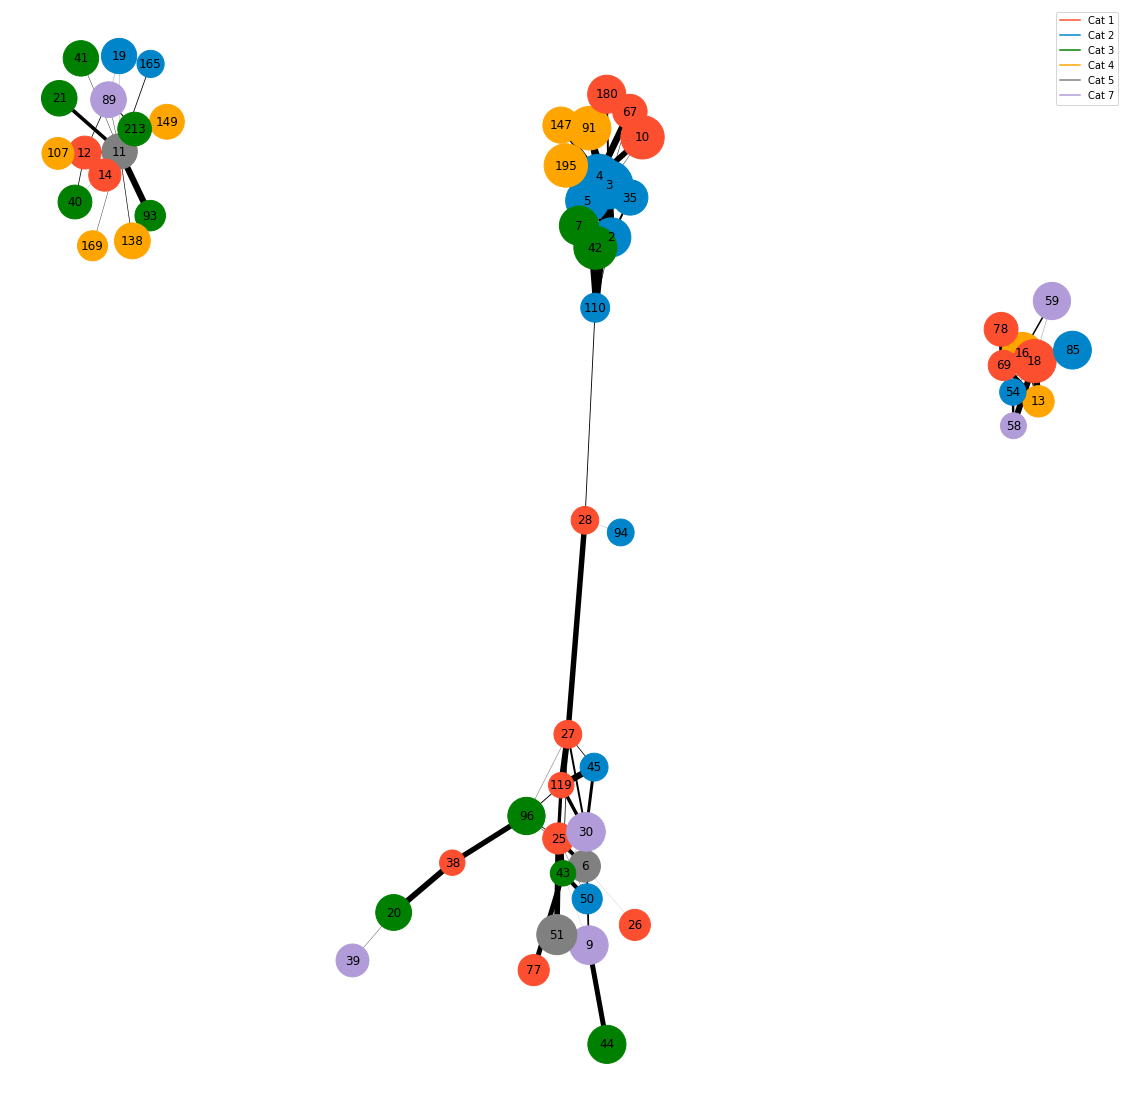

kamada_kawai_layout


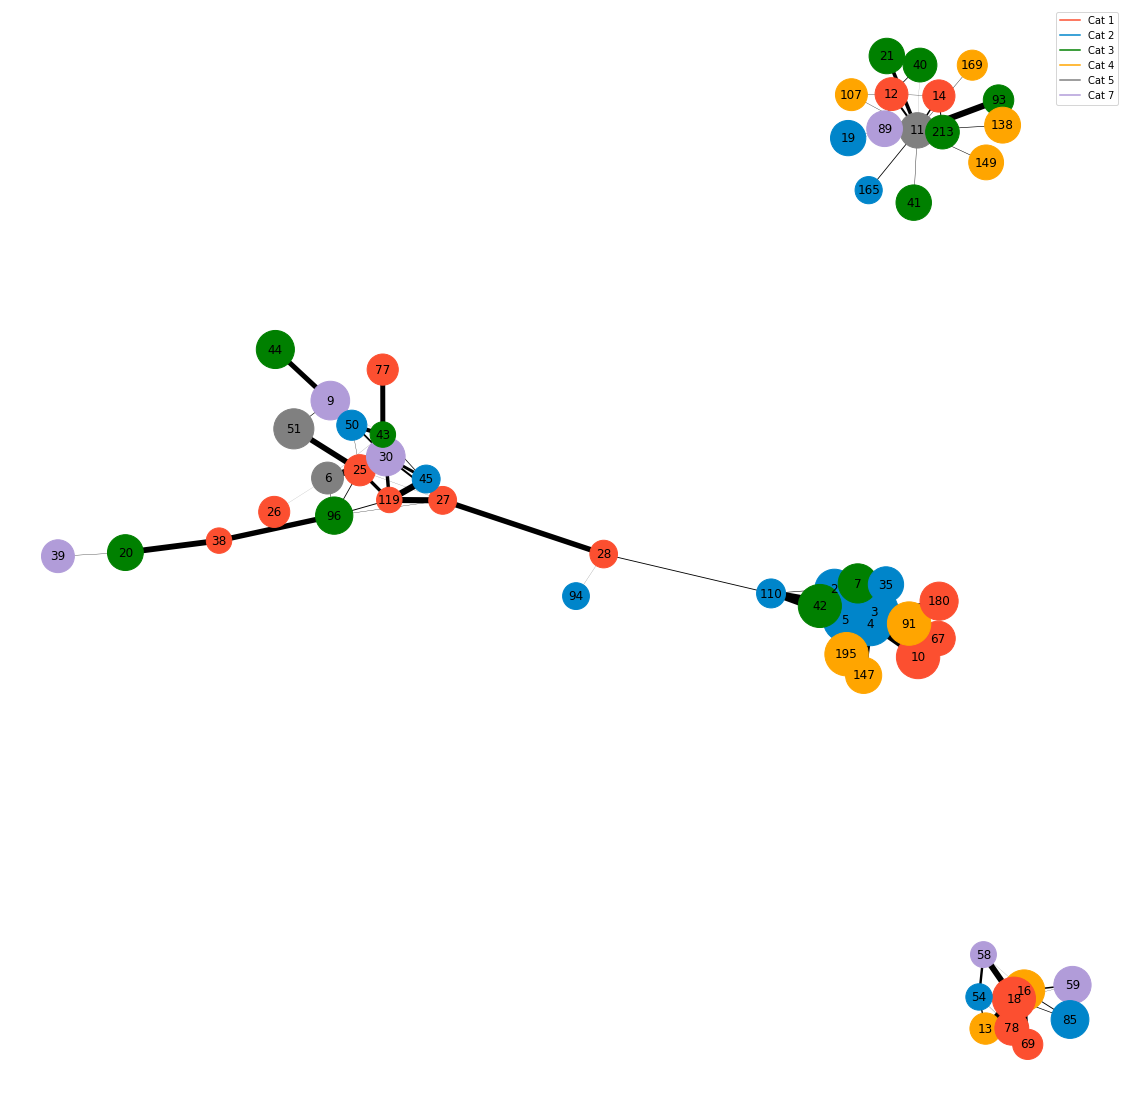

spring_layout


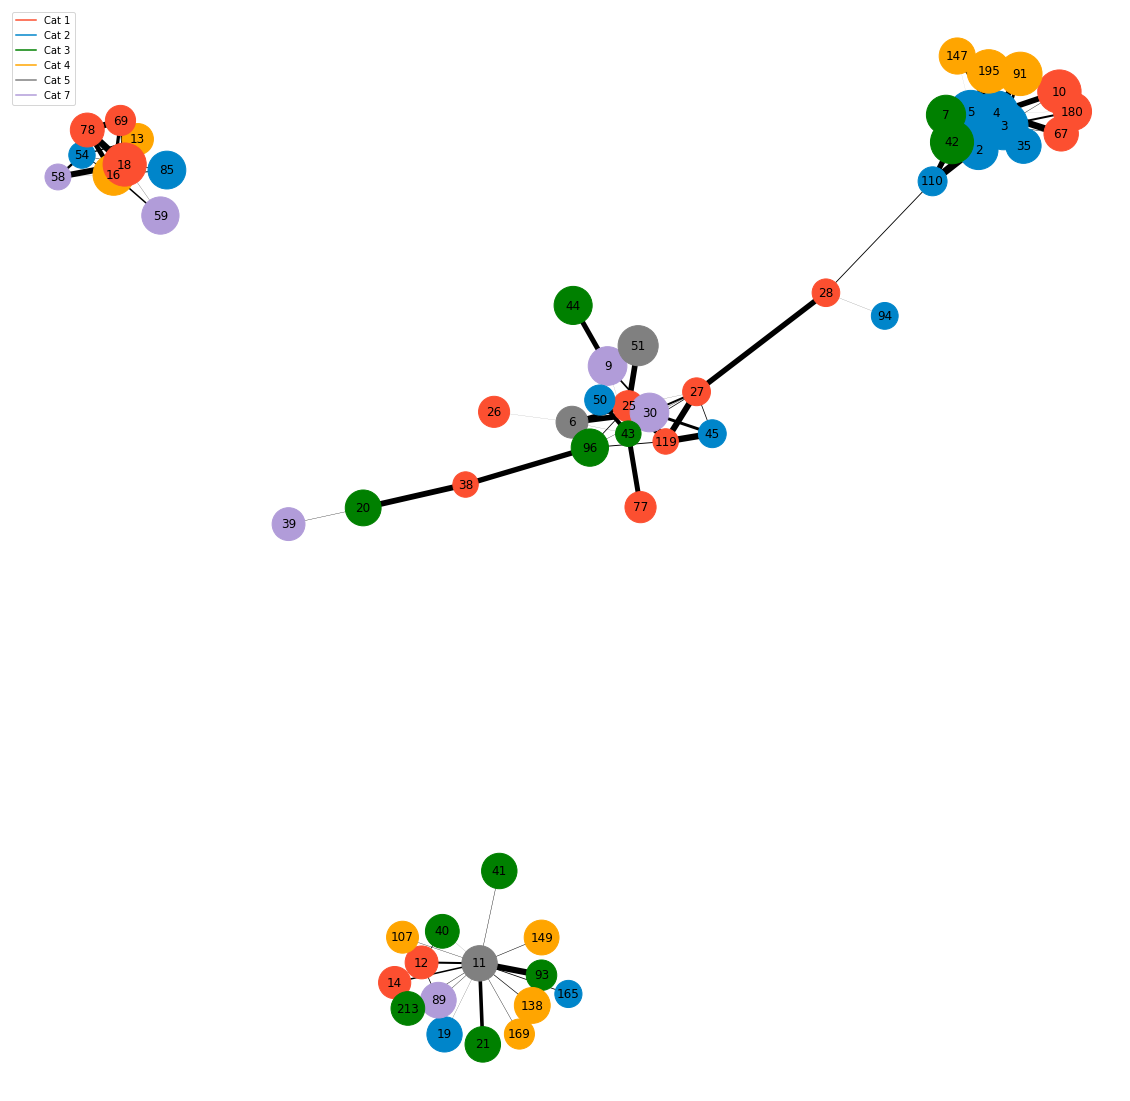

circular_layout


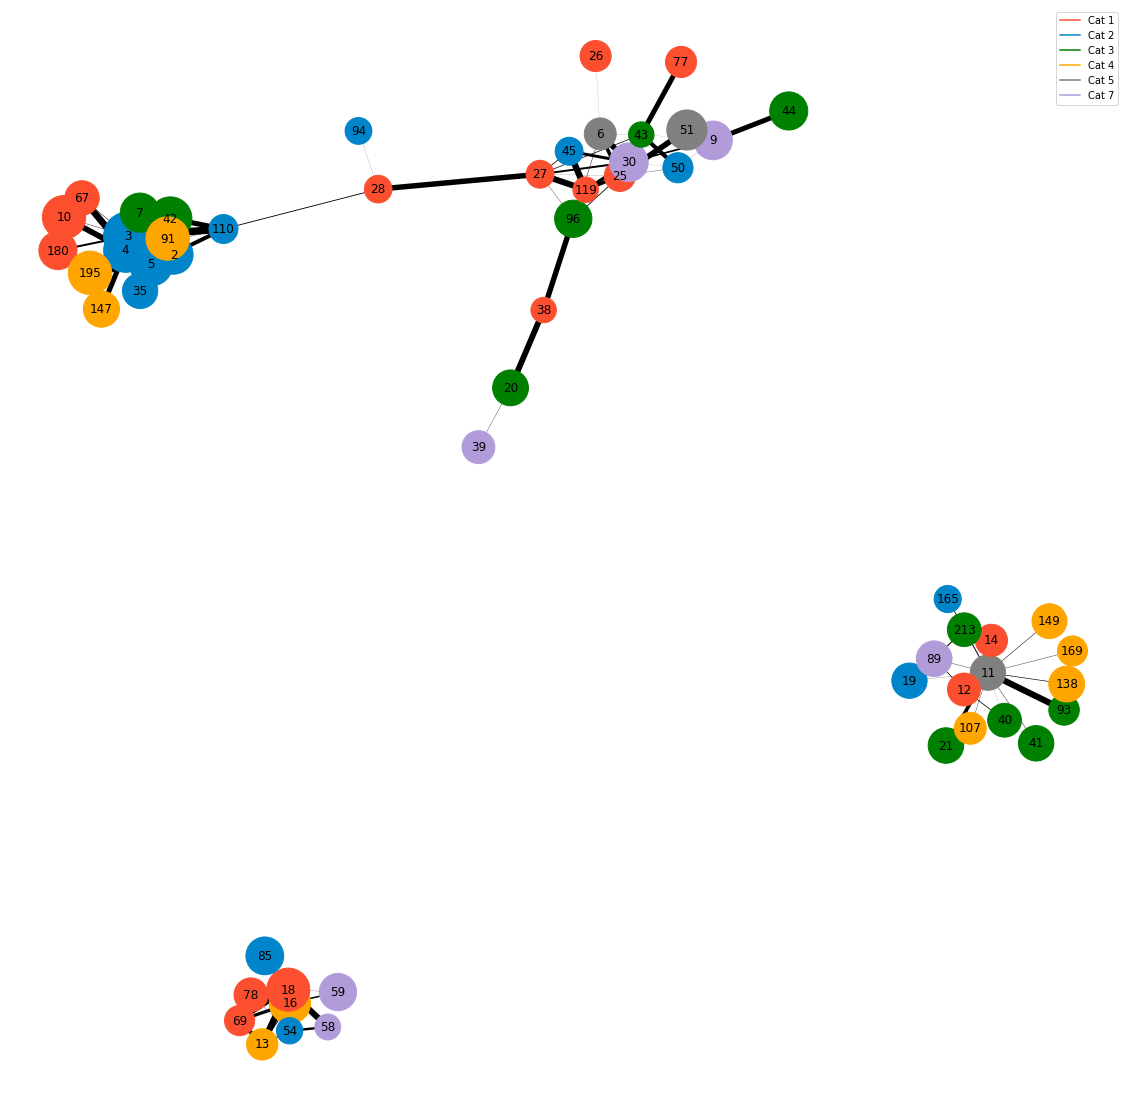

In [55]:
plt.rcParams["figure.figsize"] = (20,20)

for layout in layouts:
    print(layout)
    for i in [1,2,3,4,5,7]:
        plt.plot([0],[0], color=prdcat1_color[i], label=f'Cat {i}')
        
    plt.axis('off')
    plt.legend()
    pos = eval(f'nx.{layout}(G)')
    nx.draw(
        G, with_labels=True, 
        node_color = connected_nodes['color'],
        node_size = connected_nodes['log_n_orders']**2*10,
        width = one2one_rules['confidence']*10
    )
    plt.legend()
    plt.show()

## Plot All Products
- Not very interesteding because most nodes don't have an edge due to limited processing power of my PC

In [56]:
G = nx.from_pandas_edgelist(one2one_rules, 'antecedents', 'consequents', edge_attr ='confidence') 
G.add_nodes_from(nodes['prodcat2'], size=nodes['log_n_orders'])

In [57]:
layouts = [
    'fruchterman_reingold_layout'
]

fruchterman_reingold_layout


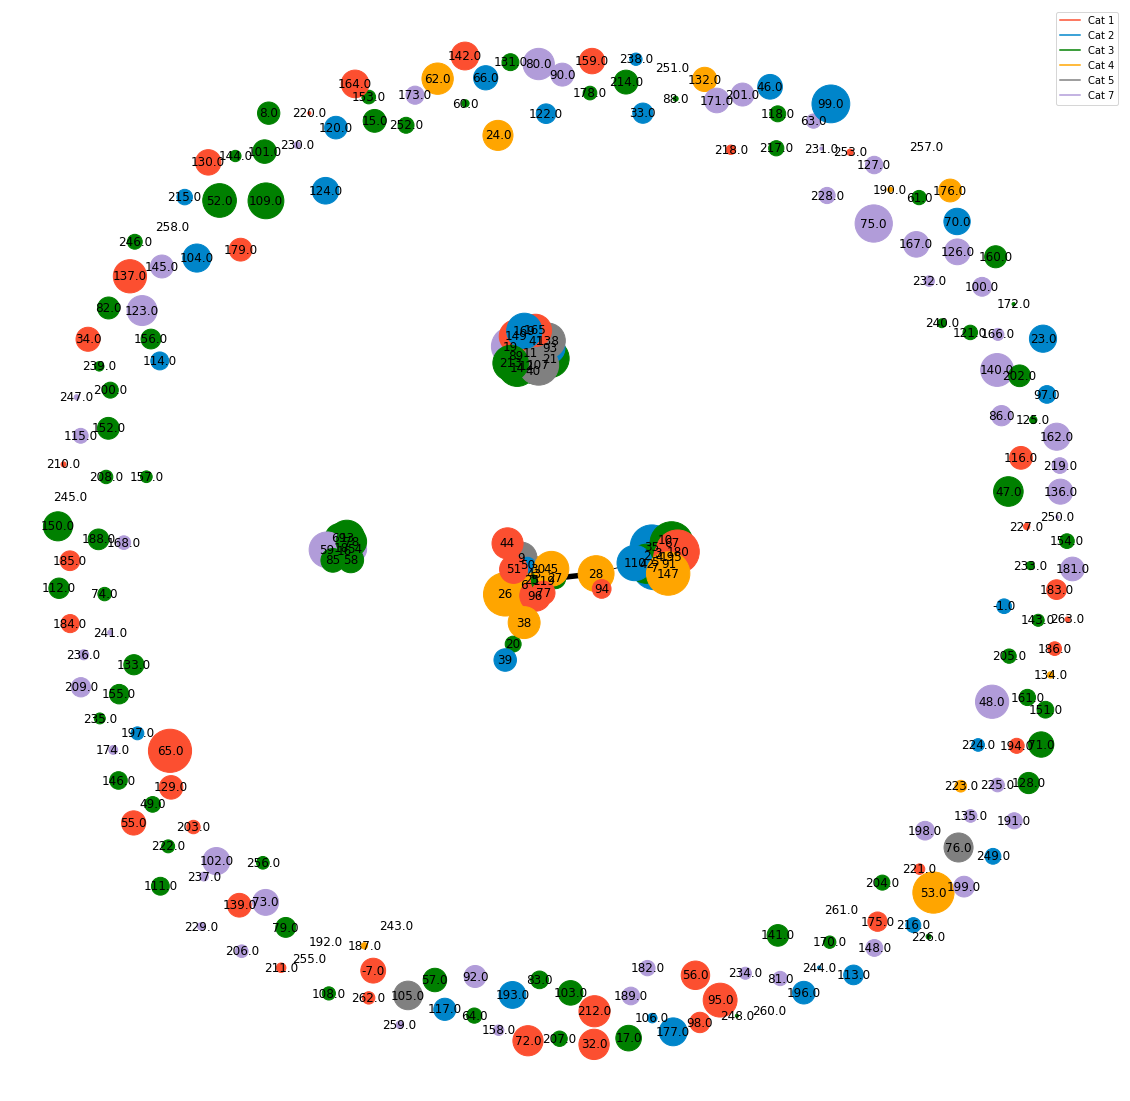

In [58]:
plt.rcParams["figure.figsize"] = (20,20)

for layout in layouts:
    print(layout)
    for i in [1,2,3,4,5,7]:
        plt.plot([0],[0], color=prdcat1_color[i], label=f'Cat {i}')
        
    plt.axis('off')
    plt.legend()
    pos = eval(f'nx.{layout}(G)')
    nx.draw(
        G, with_labels=True, 
        node_color = nodes['color'],
        node_size = nodes['log_n_orders']**2*10,
        width = one2one_rules['confidence']*10
    )
    plt.legend()
    plt.show()